In [1]:
from __init__ import * 

# 2d

In [2]:
device = 'cpu'
sigma = 25

torch.manual_seed(2023)

with open('ExpB/data/mri40frames.pickle', 'rb') as handle:
    img_numpy  = pickle.load(handle)

img = img_numpy[:, :, 20]
img_tensor = torch.from_numpy(img)[None, None, :, :].double().to(device) 
y = img_tensor + sigma / 255 * torch.normal(0, 1, size=img_tensor.size()).to(device)

In [3]:
print('2d image size:', img.shape)

2d image size: (583, 493)


-------------------------- SVD --------------------------
GPU, SVD time 200 iter:  19.709524631500244
CPU, SVD time 200 iter:  101.68392291069031
PSNR:  26.279535711807082


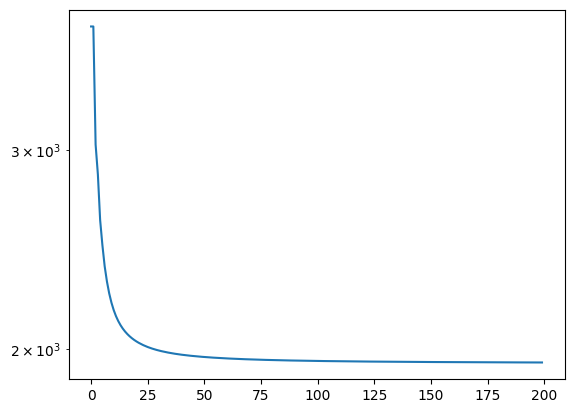

-------------------------- SVD Closed --------------------------
GPU, SVD Closed time 200 iter:  0.7860745906829834
CPU, SVD Closed time 200 iter:  4.176957774162292
PSNR:  26.27864058300684


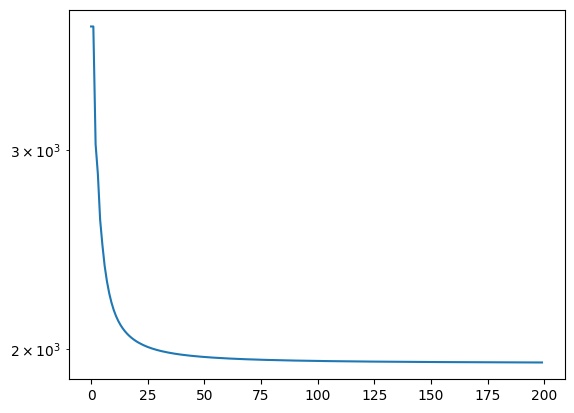

-------------------------- Box --------------------------
GPU, Box time 200 iter:  0.14271745681762696
CPU, Box time 200 iter:  4.728785753250122
PSNR:  26.375901134454317


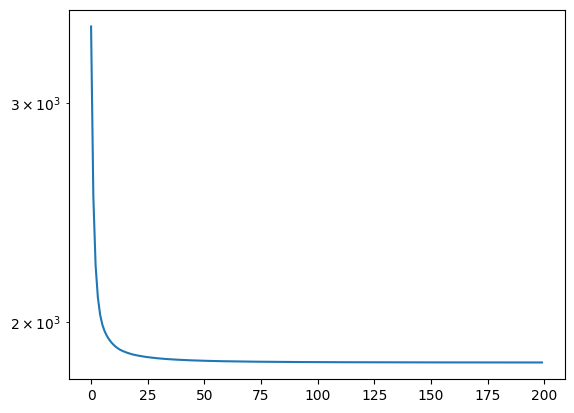

In [4]:
print('-------------------------- SVD --------------------------')
time = np.loadtxt('ExpB/2d/time/svd_gpu.txt')
time_cpu = np.loadtxt('ExpB/2d/time/svd_cpu.txt')
loss = np.loadtxt('ExpB/2d/loss/svd.txt')
c_svd = torch.load('ExpB/2d/signal/svd.pt')

print('GPU, SVD time 200 iter: ', time)
print('CPU, SVD time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_svd, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()

print('-------------------------- SVD Closed --------------------------')
time = np.loadtxt('ExpB/2d/time/svd_closed_gpu.txt')
time_cpu = np.loadtxt('ExpB/2d/time/svd_closed_cpu.txt')
loss = np.loadtxt('ExpB/2d/loss/svd_closed.txt')
c_svd_closed = torch.load('ExpB/2d/signal/svd_closed.pt')

print('GPU, SVD Closed time 200 iter: ', time)
print('CPU, SVD Closed time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_svd_closed, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()

print('-------------------------- Box --------------------------')
time = np.loadtxt('ExpB/2d/time/box_gpu.txt')
time_cpu = np.loadtxt('ExpB/2d/time/box_cpu.txt')
loss = np.loadtxt('ExpB/2d/loss/box.txt')
c_box = torch.load('ExpB/2d/signal/box.pt')

print('GPU, Box time 200 iter: ', time)
print('CPU, Box time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_box, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()

# 3d

In [5]:
np.random.seed(2023)
(im_size_x, im_size_y, im_size_z) = img_numpy.shape
img_numpy = (img_numpy - np.min(np.min(img_numpy))) / np.max(np.max(img_numpy))
img_noisy = img_numpy  +  sigma / 255 * np.random.normal(0, 1, size=img_numpy.shape)

img_tensor = torch.from_numpy(img_numpy).float().view(1, 1, *img_numpy.shape).to(device)
y =  torch.from_numpy(img_noisy).float().view(1, 1, *img_numpy.shape).to(device).double()

In [6]:
print('3d image size:', img_numpy.shape)

3d image size: (583, 493, 40)


-------------------------- SVD --------------------------
GPU, SVD time 200 iter:  2141.910325050354
CPU, SVD time 200 iter:  9781.417737483978
PSNR:  30.660717911876976


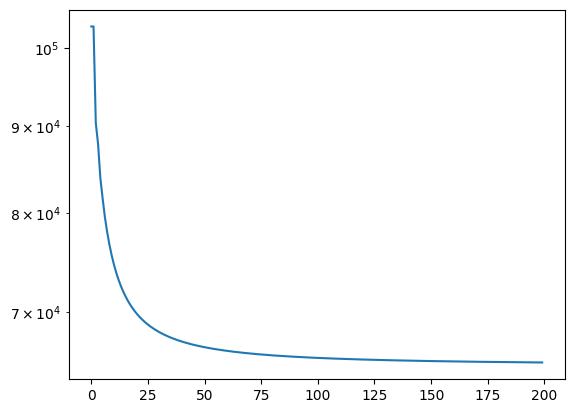

-------------------------- SVD Closed --------------------------
GPU, SVD Closed time 200 iter:  110.23320345878601
CPU, SVD Closed time 200 iter:  1258.896550655365
PSNR:  30.660602843772338


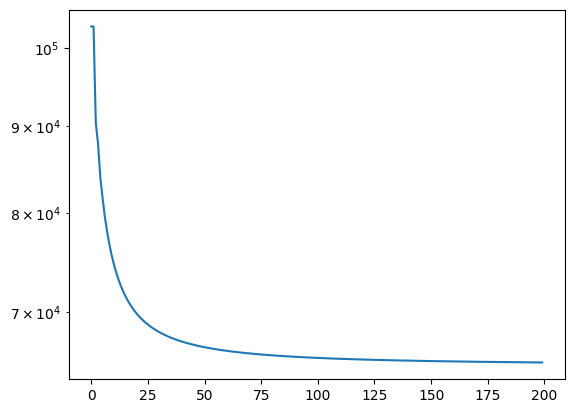

-------------------------- Box --------------------------
GPU, Box time 200 iter:  16.00510060787201
CPU, Box time 200 iter:  434.50713846683504
PSNR:  31.061488234143006


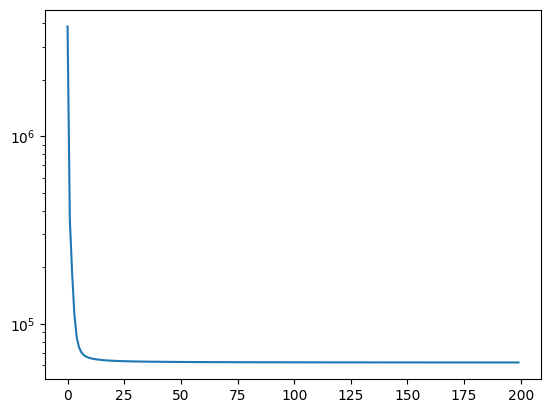

In [7]:
print('-------------------------- SVD --------------------------')
time = np.loadtxt('ExpB/3d/time/svd_gpu.txt')
time_cpu = np.loadtxt('ExpB/3d/time/svd_cpu.txt')
loss = np.loadtxt('ExpB/3d/loss/svd.txt')
c_svd = torch.load('ExpB/3d/signal/svd.pt')

print('GPU, SVD time 200 iter: ', time)
print('CPU, SVD time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_svd, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()

print('-------------------------- SVD Closed --------------------------')
time = np.loadtxt('ExpB/3d/time/svd_closed_gpu.txt')
time_cpu = np.loadtxt('ExpB/3d/time/svd_closed_cpu.txt')
loss = np.loadtxt('ExpB/3d/loss/svd_closed.txt')
c_svd_closed = torch.load('ExpB/3d/signal/svd_closed.pt')

print('GPU, SVD Closed time 200 iter: ', time)
print('CPU, SVD Closed time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_svd_closed, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()

print('-------------------------- Box --------------------------')
time = np.loadtxt('ExpB/3d/time/box_gpu.txt')
time_cpu = np.loadtxt('ExpB/3d/time/box_cpu.txt')
loss = np.loadtxt('ExpB/3d/loss/box.txt')
c_box = torch.load('ExpB/3d/signal/box.pt')

print('GPU, Box time 200 iter: ', time)
print('CPU, Box time 200 iter: ', time_cpu)

psnr_box = compute_PSNR(c_box, img_tensor, 1)
print('PSNR: ', psnr_box)

plt.plot(loss)
plt.yscale('log')
plt.show()